In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

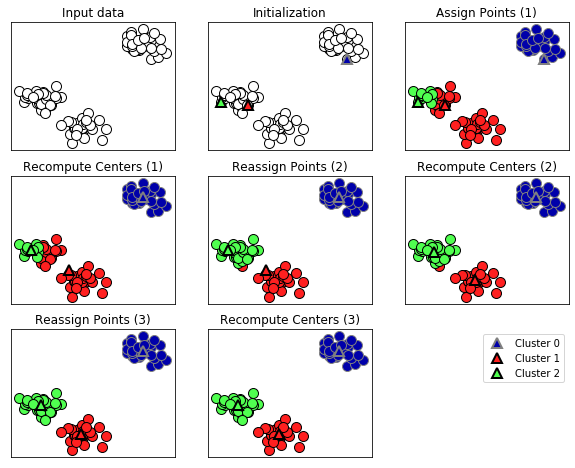

In [3]:
mglearn.plots.plot_kmeans_algorithm()

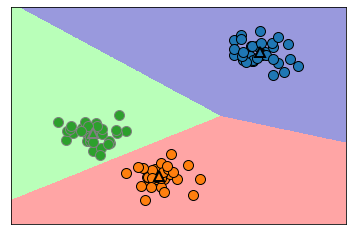

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#合成2次元データを作る
X,y = make_blobs(random_state=1)

#クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print(kmeans.labels_)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [7]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


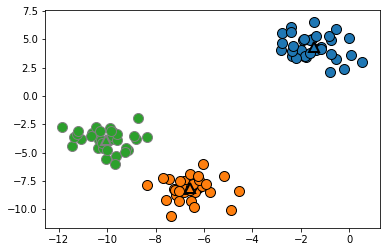

In [8]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)

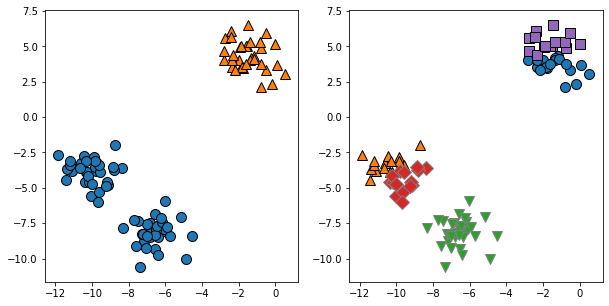

In [9]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

#クラスセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

#クラスセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

Text(0, 0.5, 'Feature 1')

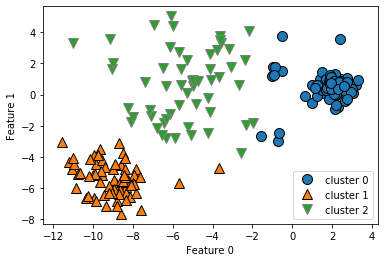

In [10]:
X_varied,y_varied = make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],random_state=170)
y_pred = KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

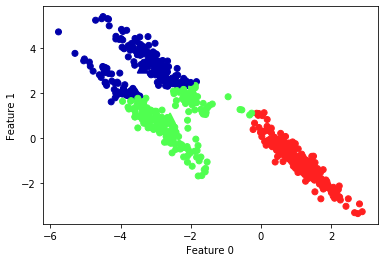

In [11]:
#ランダムにクラスデータを作成
X,y = make_blobs(random_state=170,n_samples=600)
rng = np.random.RandomState(74)

#対角線方向に引き伸ばす
transformation = rng.normal(size=(2,2))
X = np.dot(X,transformation)

#データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#クラスタに割当とクラスタセンタをプロット
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[0,1,2],s=100,linewidths=2,cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

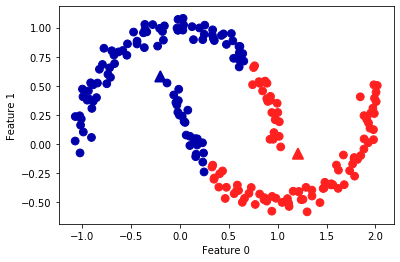

In [12]:
#合成データセットtwo_moonsデータ作成
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

#2つのクラスにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#クラス割当とクラスセンタをプロット
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidths=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [13]:
#ベクトル量子化
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
nmf = NMF(n_components=100,random_state=0)
nmf.fit(X_train)
pca=PCA(n_components=100,random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

NameError: name 'X_people' is not defined